In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
ls

drive/  sample_data/


In [4]:
%cd drive/MyDrive/

/content/drive/MyDrive


In [5]:
ls

'Assignment 3.pdf'
'Atomic Giants.mov'
 CelebA@
'CelebA (1)'/
 CelebA_img/
'Colab Notebooks'/
 education/
 generator_model_1000.h5
 g_model.pkl
'Grand Challenge- Financial Ecosystems in Rural Areas.gdoc'
'Grand Challenge Group 2.gslides'
'IMG_2354 (1).jpg'
'IMG_2354 (2).jpg'
'IMG_2354 (3).jpg'
'IMG_2354 (4).jpg'
'IMG_2354 (5).jpg'
'IMG_2354 (6).jpg'
'IMG_2354 (7).jpg'
'IMG_2354 (8).jpg'
 IMG_2354.jpg
'Meet Recordings'/
 model.pckl
 model.pkl
'my pics'/
'Plaksha Classes'/
'Plaksha Welcome Package.gform'
'Plaksha Welcome Package.gsheet'
'Plaksha Welcome Package (Responses).gsheet'
'Prototyping presentation.gslides'
 Pythin/
 Python/
 Undertaking.pdf
'Untitled spreadsheet (1).gsheet'
'Untitled spreadsheet.gsheet'
 Utkarsh_2021_Mentee_Profile.docx
'Utkarsh Mittal.jpg'
'UtkarshMittal_Resume (1).pdf'
'UtkarshMittal_Resume (2).pdf'
 UtkarshMittal_Resume.pdf


In [30]:
cd CelebA (1)

/content/drive/My Drive/CelebA (1)


In [8]:
#loading the data set
#trained the model on 7900 samples
%%time
from os import listdir
from PIL import Image as PImage
import matplotlib.image as mpimg
import numpy as np
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

imagesList = listdir('/content/drive/My Drive/CelebA (1)')
loadedImages = []
count=1
for image in imagesList:
    print(count+1)
    try:
      loadedImages.append(img_to_array(load_img('/content/drive/My Drive/CelebA (1)/'+image,target_size=(128,128,3))))
    except:
      continue  
    count=count+1

Streaming output truncated to the last 5000 lines.
2904
2905
2906
2907
2908
2909
2910
2911
2912
2913
2914
2915
2916
2917
2918
2919
2920
2921
2922
2923
2924
2925
2926
2927
2928
2929
2930
2931
2932
2933
2934
2935
2936
2937
2938
2939
2940
2941
2942
2943
2944
2945
2946
2947
2948
2949
2950
2951
2952
2953
2954
2955
2956
2957
2958
2959
2960
2961
2962
2963
2964
2965
2966
2967
2968
2969
2970
2971
2972
2973
2974
2975
2976
2977
2978
2979
2980
2981
2982
2983
2984
2985
2986
2987
2988
2989
2990
2991
2992
2993
2994
2995
2996
2997
2998
2999
3000
3001
3002
3003
3004
3005
3006
3007
3008
3009
3010
3011
3012
3013
3014
3015
3016
3017
3018
3019
3020
3021
3022
3023
3024
3025
3026
3027
3028
3029
3030
3031
3032
3033
3034
3035
3036
3037
3038
3039
3040
3041
3042
3043
3044
3045
3046
3047
3048
3049
3050
3051
3052
3053
3054
3055
3056
3057
3058
3059
3060
3061
3062
3063
3064
3065
3066
3067
3068
3069
3070
3071
3072
3073
3074
3075
3076
3077
3078
3079
3080
3081
3082
3083
3084
3085
3086
3087
3088
3089
3090
3091
3092
3093

In [9]:
loadedImages = np.array(loadedImages)
loadedImages.shape

(7900, 128, 128, 3)

In [10]:
from numpy import expand_dims
from numpy import zeros
from numpy import ones
from numpy import vstack
from numpy.random import randn
from numpy.random import randint
from keras.datasets.mnist import load_data
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Reshape
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import LeakyReLU
from keras.layers import Dropout
from matplotlib import pyplot


In [11]:
def define_discriminator(in_shape=(128,128,3)):
	model = Sequential()
	model.add(Conv2D(128, (3,3), strides=(2, 2), padding='same', input_shape=in_shape))
	model.add(LeakyReLU(alpha=0.2))
	model.add(Dropout(0.4))
	model.add(Conv2D(256, (3,3), strides=(2, 2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	model.add(Dropout(0.4))
	model.add(Flatten())
	model.add(Dense(1, activation='sigmoid'))
	opt = Adam(lr=0.0002, beta_1=0.5)
	model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
	return model

In [12]:
def define_generator(latent_dim):
    model = Sequential()
    n_nodes = 256 * 8 * 8
    model.add(Dense(n_nodes, input_dim=latent_dim))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Reshape((8, 8, 256)))
    model.add(Conv2DTranspose(256, (2,2), strides=(2,2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Conv2DTranspose(128, (2,2), strides=(2,2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Conv2DTranspose(128, (2,2), strides=(2,2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Conv2DTranspose(128, (2,2), strides=(2,2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Conv2D(3, (1,1), activation='sigmoid', padding='same'))
    return model

In [13]:
def define_gan(g_model, d_model):
	d_model.trainable = False
	model = Sequential()
	model.add(g_model)
	model.add(d_model)
	opt = Adam(lr=0.0002, beta_1=0.5)
	model.compile(loss='binary_crossentropy', optimizer=opt)
	return model

In [14]:
def load_real_samples():
	X= loadedImages
# 	X = expand_dims(trainX, axis=-1)
	X = X.astype('float32')
	X = X / 255.0
	return X

In [15]:
def generate_real_samples(dataset, n_samples):
	ix = randint(0, dataset.shape[0], n_samples)
	X = dataset[ix]
	y = ones((n_samples, 1))
	return X, y

In [16]:
def generate_latent_points(latent_dim, n_samples):
	x_input = randn(latent_dim * n_samples)
	x_input = x_input.reshape(n_samples, latent_dim)
	return x_input

In [17]:
def generate_fake_samples(g_model, latent_dim, n_samples):
	x_input = generate_latent_points(latent_dim, n_samples)
	X = g_model.predict(x_input)
	y = zeros((n_samples, 1))
	return X, y

In [18]:
def save_plot(examples, epoch, n=10):
	for i in range(n * n):
		pyplot.subplot(n, n, 1 + i)
		pyplot.axis('off')
		pyplot.imshow(examples[i, :, :, 0], cmap='gray_r')
	filename = 'generated_plot_e%03d.png' % (epoch+1)
	pyplot.savefig(filename)
	pyplot.close()

In [19]:
def summarize_performance(epoch, g_model, d_model, dataset, latent_dim, n_samples=100):
	X_real, y_real = generate_real_samples(dataset, n_samples)
	_, acc_real = d_model.evaluate(X_real, y_real, verbose=0)
	x_fake, y_fake = generate_fake_samples(g_model, latent_dim, n_samples)
	_, acc_fake = d_model.evaluate(x_fake, y_fake, verbose=0)
	print('>Accuracy real: %.0f%%, fake: %.0f%%' % (acc_real*100, acc_fake*100))
	save_plot(x_fake, epoch)
	filename = 'generator_model_%03d.h5' % (epoch + 1)
	g_model.save(filename)

In [20]:
def train(g_model, d_model, gan_model, dataset, latent_dim, n_epochs=1000, n_batch=256):
	bat_per_epo = int(dataset.shape[0] / n_batch)
	half_batch = int(n_batch / 2)
	for i in range(n_epochs):
		for j in range(bat_per_epo):
			X_real, y_real = generate_real_samples(dataset, half_batch)
			X_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
			X, y = vstack((X_real, X_fake)), vstack((y_real, y_fake))
			d_loss, _ = d_model.train_on_batch(X, y)
			X_gan = generate_latent_points(latent_dim, n_batch)
			y_gan = ones((n_batch, 1))
			g_loss = gan_model.train_on_batch(X_gan, y_gan)
			print('>%d, %d/%d, d=%.3f, g=%.3f' % (i+1, j+1, bat_per_epo, d_loss, g_loss))
		if (i+1) % 10 == 0:
			summarize_performance(i, g_model, d_model, dataset, latent_dim)

In [21]:
latent_dim = 100
d_model = define_discriminator()
g_model = define_generator(latent_dim)
gan_model = define_gan(g_model, d_model)
dataset = load_real_samples()
train(g_model, d_model, gan_model, dataset, latent_dim)

Streaming output truncated to the last 5000 lines.
>834, 28/30, d=0.189, g=1.576
>834, 29/30, d=0.243, g=3.181
>834, 30/30, d=0.246, g=1.576
>835, 1/30, d=0.249, g=2.479
>835, 2/30, d=0.199, g=2.122
>835, 3/30, d=0.194, g=2.197
>835, 4/30, d=0.210, g=2.659
>835, 5/30, d=0.177, g=2.173
>835, 6/30, d=0.161, g=2.475
>835, 7/30, d=0.165, g=2.910
>835, 8/30, d=0.159, g=1.917
>835, 9/30, d=0.266, g=3.835
>835, 10/30, d=0.422, g=0.719
>835, 11/30, d=0.550, g=3.392
>835, 12/30, d=0.320, g=2.404
>835, 13/30, d=0.246, g=2.134
>835, 14/30, d=0.267, g=2.323
>835, 15/30, d=0.273, g=1.861
>835, 16/30, d=0.241, g=2.275
>835, 17/30, d=0.245, g=2.151
>835, 18/30, d=0.199, g=2.499
>835, 19/30, d=0.275, g=1.585
>835, 20/30, d=0.213, g=2.652
>835, 21/30, d=0.158, g=2.490
>835, 22/30, d=0.176, g=1.988
>835, 23/30, d=0.188, g=2.833
>835, 24/30, d=0.150, g=2.382
>835, 25/30, d=0.151, g=2.855
>835, 26/30, d=0.153, g=2.730
>835, 27/30, d=0.175, g=2.158
>835, 28/30, d=0.185, g=2.881
>835, 29/30, d=0.170, g=1.91

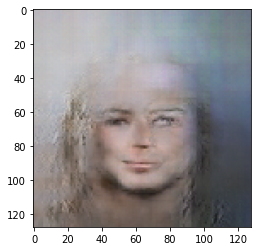

In [37]:
#Image 1
x_input = generate_latent_points(100, 1)
	# predict outputs
X = g_model.predict(x_input)
plt.imshow(X[0])

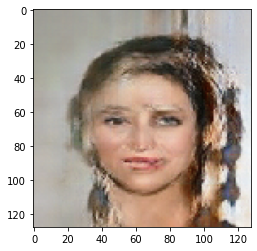

In [38]:
#Image 2
x_input = generate_latent_points(100, 1)
	# predict outputs
X = g_model.predict(x_input)
plt.imshow(X[0])

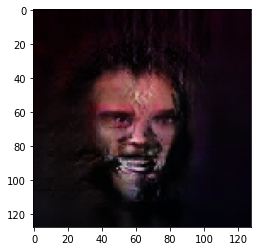

In [76]:
#Image 3
plt.imshow(generate_fake_samples(g_model,100,5)[0][4])


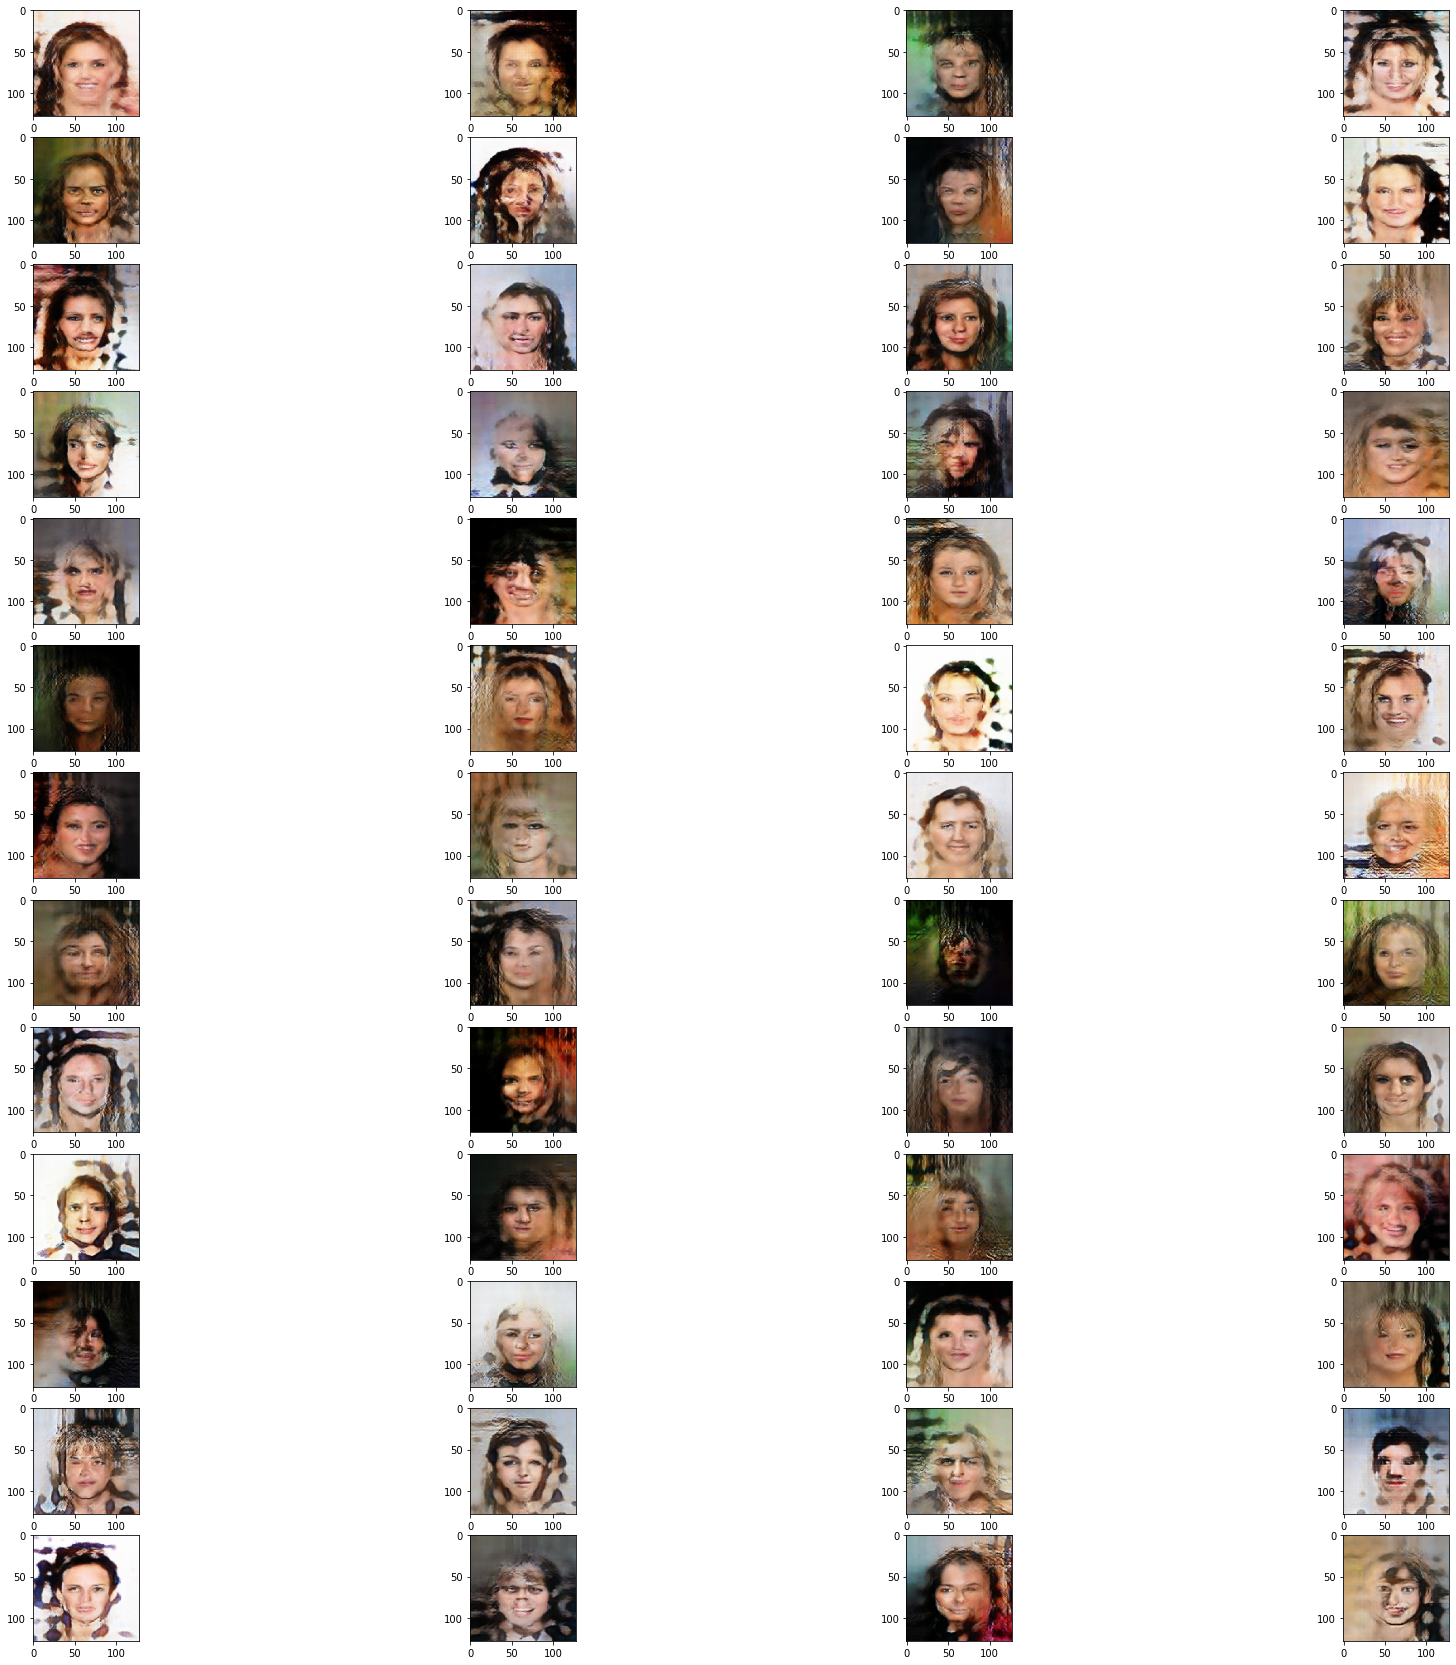

In [92]:
#Plotted for trained models after 10 epochs after 500 epochs
plt.figure(figsize = (30,30))
j=0
for i in range(480,1000,10):
  plt.subplot(13,4,j+1)
  model = keras.models.load_model('/content/drive/My Drive/generator_model_'+str(i)+'.h5')
  X = generate_fake_samples(model,100,1)[0][0]
  import matplotlib.pyplot as plt
  import matplotlib.image as mpimg
  plt.imshow(X)
  j=j+1